In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import ttest_ind
# from pandas.core.base import duplicated
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
# from helpers import categorical_univariate , categorical_bivariate
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('Employee.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
duplicates_rows = data[data.duplicated()]
print ("Duplicated rows are :")
duplicates_rows

Duplicated rows are :


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [7]:
duplicate_count = data[data.duplicated()].shape[0]

# Print the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 1889


In [8]:
# Remove duplicate rows and update 'data'
data = data.drop_duplicates()

# Reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

In [9]:
duplicates_rows = data[data.duplicated()]
print ("Duplicated rows are :")
duplicates_rows

Duplicated rows are :


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot


In [10]:
# Function to Apply test statistic for all categorical colunms
def test_statistic (column_name) :
  """
    Perform a Chi-squared test for independence between two categorical variables.
    Args:
        column_name (str): a categorical variable.
    Returns:
        chi2_stat (float): Chi-squared test statistic.
        p_val (float): P-value of the test.
        dof (int): Degrees of freedom.
        expected (ndarray): Expected frequencies under the null hypothesis.
    """
  # Create Contingency Table
  contingency_table = pd.crosstab(data[column_name], data['LeaveOrNot'])
  print("our table ",contingency_table)

  # Perform Chi-squared Test
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-squared Statistic: {chi2_stat}")
  print(f"P-value: {p_val}")
  print(f"Degrees of Freedom: {dof}")
  print("Expected Frequencies:")
  print(expected)

In [11]:
test_statistic ("Education")

our table  LeaveOrNot     0    1
Education            
Bachelors   1232  739
Masters      328  309
PHD          116   40
Chi-squared Statistic: 37.51437379018137
P-value: 7.142614900414181e-09
Degrees of Freedom: 2
Expected Frequencies:
[[1195.15050651  775.84949349]
 [ 386.25615051  250.74384949]
 [  94.59334298   61.40665702]]


In [12]:
test_statistic ("City")

our table  LeaveOrNot    0    1
City                
Bangalore   761  410
New Delhi   522  270
Pune        393  408
Chi-squared Statistic: 63.456310788157964
P-value: 1.6620236195219495e-14
Degrees of Freedom: 2
Expected Frequencies:
[[710.05643994 460.94356006]
 [480.2431259  311.7568741 ]
 [485.70043415 315.29956585]]


In [13]:
test_statistic ("Gender")

our table  LeaveOrNot     0    1
Gender               
Female       621  614
Male        1055  474
Chi-squared Statistic: 99.4786554526017
P-value: 1.9828893039106066e-23
Degrees of Freedom: 1
Expected Frequencies:
[[748.86396527 486.13603473]
 [927.13603473 601.86396527]]


In [14]:
# Select numeric values
numeric_df = data.select_dtypes(include='number')
id = numeric_df ['LeaveOrNot']
numeric_df.drop ("LeaveOrNot", axis =1,inplace=True  )
age = numeric_df ['Age']
numeric_df.drop ("Age", axis =1,inplace=True )

JoiningYear


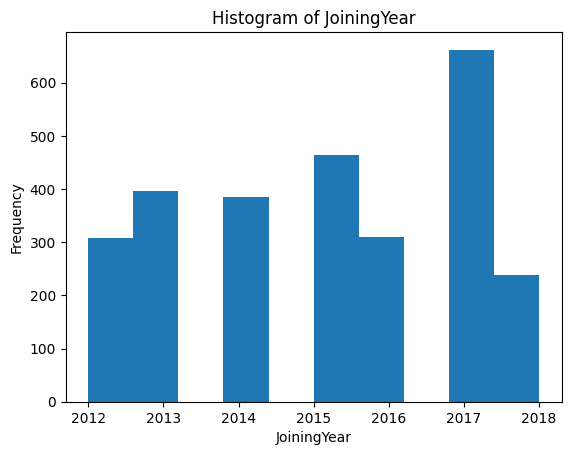

PaymentTier


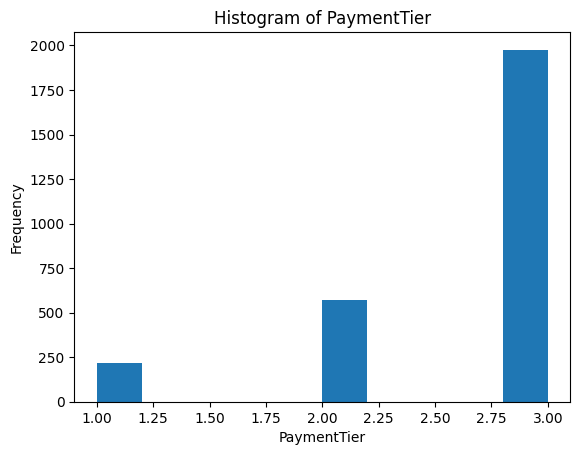

ExperienceInCurrentDomain


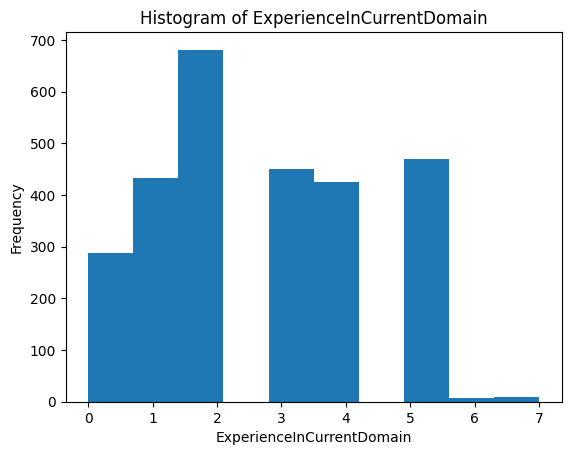

In [15]:
# Univariate analysis - Histograms distributions
for column in numeric_df.columns:
    plt.figure()
    print (column)
    numeric_df[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

JoiningYear


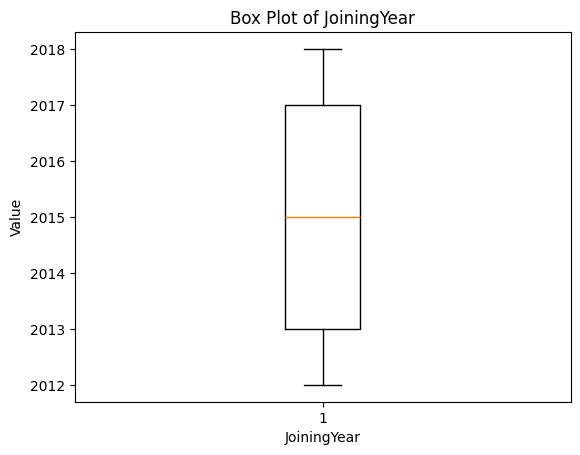

PaymentTier


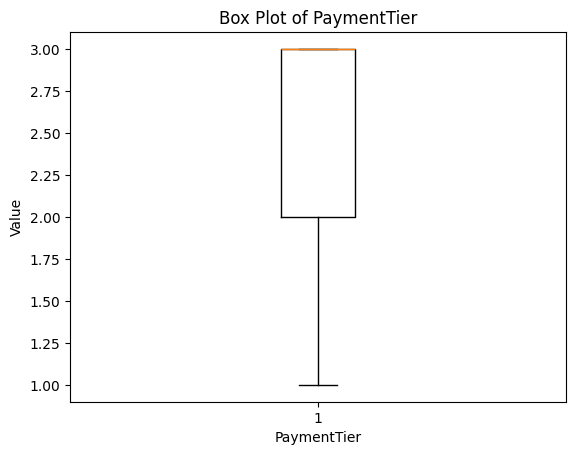

ExperienceInCurrentDomain


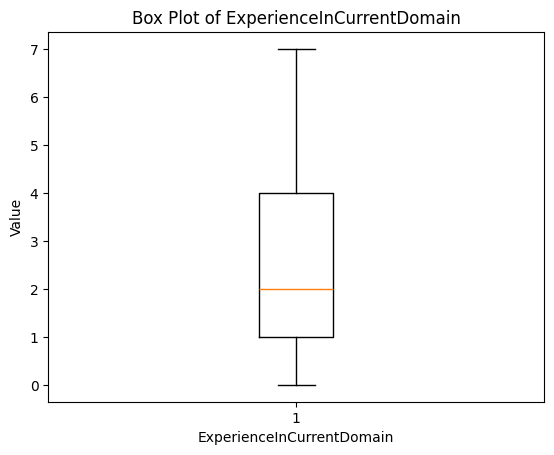

In [16]:
for column in numeric_df.columns:
    plt.figure()
    print(column)
    plt.boxplot(numeric_df[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
    plt.show()

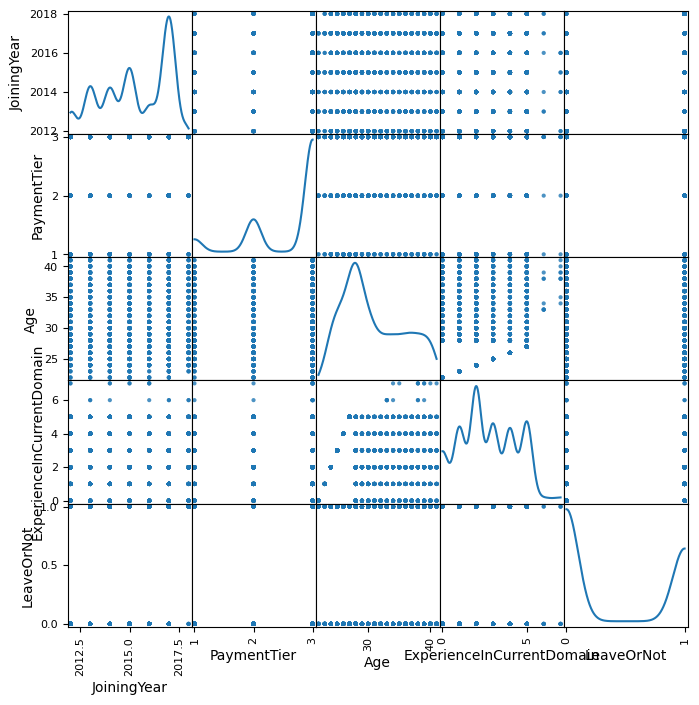

In [17]:
# Check for Multicollinearity
scatter_matrix(data , alpha=0.8, figsize=(8, 8), diagonal='kde')
plt.show()

In [18]:
def plot_skewness_all_features(df):
    num_features = df.select_dtypes(include=['float64', 'int64'])  # Select numerical features
    num_cols = num_features.columns
    num_cols_count = len(num_cols)
    num_rows = math.ceil(num_cols_count / 2)

    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
    fig.tight_layout(pad=3.0)

    for i, col in enumerate(num_cols):
        ax = axes[i // 2, i % 2] if num_cols_count > 1 else axes[i % 2]
        sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.show()

In [19]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                2764 non-null   int64
 1   PaymentTier                2764 non-null   int64
 2   ExperienceInCurrentDomain  2764 non-null   int64
dtypes: int64(3)
memory usage: 64.9 KB


C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_5448\4052878665.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
c:\Users\MEAPAL\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MEAPAL\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wit

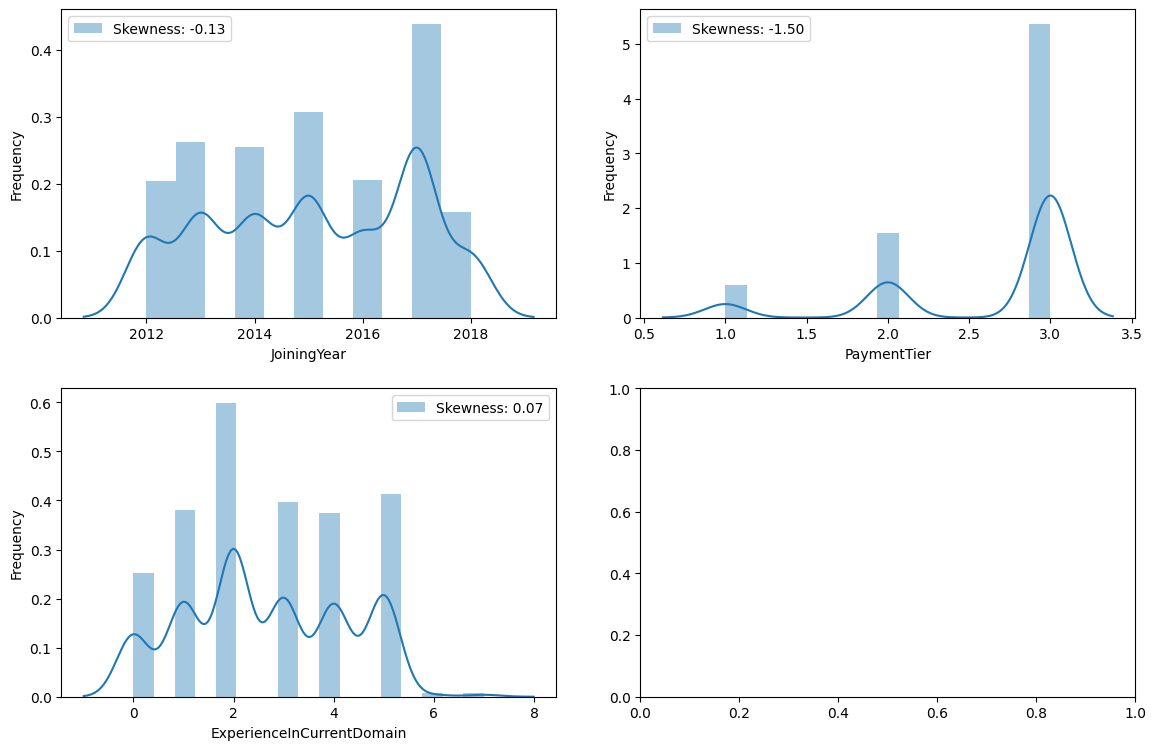

In [20]:
plot_skewness_all_features(numeric_df)

In [21]:
# numeric_df['PaymentTier'] = np.cbrt(numeric_df['PaymentTier'])
# numeric_df['ExperienceInCurrentDomain'] = np.cbrt(numeric_df['ExperienceInCurrentDomain'])
# numeric_df['JoiningYear'] = np.cbrt(numeric_df['JoiningYear'])

In [22]:
def test_numeric_features(df, numeric_columns, target_column):
    results = {}
    for column in numeric_columns:
        category_0 = df[column][df[target_column] == 0]
        category_1 = df[column][df[target_column] == 1]
        # Perform t-test
        statistic, p_value = ttest_ind(category_0, category_1)
        results[column] = p_value

    return results

In [23]:
num_cols=numeric_df.columns

In [24]:
results = test_numeric_features(data, numeric_columns=num_cols, target_column='LeaveOrNot')
print(results)

{'JoiningYear': 1.6912741711926329e-15, 'PaymentTier': 2.5635859001966685e-10, 'ExperienceInCurrentDomain': 0.2656199090872741}


In [25]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_5448\2323200892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = scaler.fit_transform(data[num_cols])


In [26]:
data = pd.get_dummies(data,drop_first=True)

In [27]:
X = data.drop(columns=['LeaveOrNot'])

In [28]:
X.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,1.012701,0.583382,34,-1.642132,False,False,False,False,True,False
1,-1.108637,-2.622319,28,0.220853,False,False,False,True,False,False
2,-0.578303,0.583382,38,-0.400142,False,False,True,False,False,False
3,0.482367,0.583382,27,1.462843,True,False,False,False,True,False
4,1.012701,0.583382,24,-0.400142,True,False,False,True,True,True


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix

# **K Means Clustering**

In [30]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], size=self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        self.cluster_labels = labels
        self.cluster_counts = [np.sum(labels == k) for k in range(self.n_clusters)]

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def compute_inertia(self, X):
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[self.cluster_labels == k]
            cluster_center = self.centroids[k]
            cluster_inertia = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
            inertia += cluster_inertia
        return inertia

In [31]:
if __name__ == "__main__":
    np.random.seed(0)
    X = np.random.rand(2764, 2)

    n_clusters_range = range(1, 11)
    inertia_values = []

    for n_clusters in n_clusters_range:
        kmeans_custom = KMeansCustom(n_clusters=n_clusters)
        kmeans_custom.fit(X)
        inertia = kmeans_custom.compute_inertia(X)
        inertia_values.append(inertia)

Optimal Number of Clusters: 2


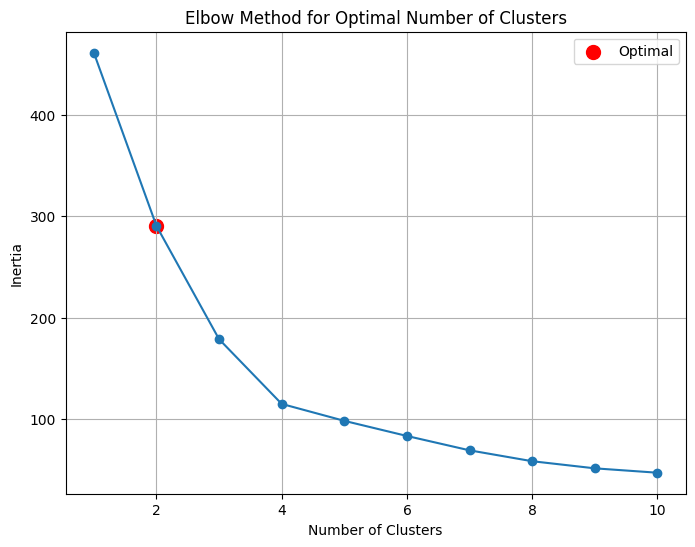

In [32]:
delta_inertia = np.diff(inertia_values)

# Calculate the second derivative to find inflection points
second_derivative = np.diff(delta_inertia)

# Find the index where the second derivative changes sign
optimal_index = np.where(second_derivative > 0)[0][0] + 1

# Get the optimal number of clusters
optimal_n_clusters = n_clusters_range[optimal_index]

# Print the optimal number of clusters
print(f"Optimal Number of Clusters: {optimal_n_clusters}")

# Plot the elbow curve and mark the optimal point
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.scatter(optimal_n_clusters, inertia_values[optimal_index], color='red', label='Optimal', marker='o', s=100)
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Instantiate and fit the custom K-Means model with the optimal number of clusters
kmeans_custom = KMeansCustom(n_clusters=optimal_n_clusters)
kmeans_custom.fit(X)

print("Number of Clusters:", kmeans_custom.n_clusters)
for cluster_idx, cluster_count in enumerate(kmeans_custom.cluster_counts):
    print(f"Cluster {cluster_idx}: {cluster_count} samples")

leave_labels = data['LeaveOrNot']

# Calculate accuracy by comparing cluster labels to "LeaveOrNot" labels
accuracy = np.mean(kmeans_custom.cluster_labels == leave_labels)
print(f"Accuracy: {accuracy:.2f}")

Number of Clusters: 2
Cluster 0: 1436 samples
Cluster 1: 1328 samples
Accuracy: 0.51


# **Fuzzy C Means Clustering**

In [34]:
class FuzzyCMeansCustom:
    def __init__(self, n_clusters, m=2, max_iterations=100, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.m = m
        self.max_iterations = max_iterations
        self.tolerance = tolerance

    def initialize_membership(self, n_samples):
        return np.random.dirichlet(np.ones(self.n_clusters), size=n_samples)

    def update_centers(self, X, membership):
        membership_expanded = membership[:, :, np.newaxis]
        centers = np.sum((membership_expanded ** self.m) * X[:, np.newaxis, :], axis=0) / np.sum(membership_expanded ** self.m, axis=0)
        return centers

    def update_membership(self, X, centers):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
        distances = np.fmax(distances, np.finfo(float).eps)
        membership = 1.0 / (distances ** (2 / (self.m - 1)))
        membership = membership / np.sum(membership, axis=1, keepdims=True)
        return membership

    def fit(self, X):
        n_samples, n_features = X.shape
        membership = self.initialize_membership(n_samples)

        for iteration in range(self.max_iterations):
            centers = self.update_centers(X, membership)
            new_membership = self.update_membership(X, centers)
            if np.linalg.norm(new_membership - membership) < self.tolerance:
                break

            membership = new_membership

        self.cluster_labels = np.argmax(membership, axis=1)
        self.cluster_centers = centers

In [35]:
if __name__ == "__main__":
    np.random.seed(0)
    X = np.random.rand(2764, 2)

    n_clusters_range = range(2, 11)
    fuzzy_c_means_inertia = []

    for n_clusters in n_clusters_range:
        fcm_custom = FuzzyCMeansCustom(n_clusters=n_clusters)
        fcm_custom.fit(X)
        cost = np.sum((fcm_custom.update_membership(X, fcm_custom.cluster_centers) ** fcm_custom.m) * np.linalg.norm(X[:, np.newaxis, :] - fcm_custom.cluster_centers, axis=2))
        fuzzy_c_means_inertia.append(cost)

Optimal Number of Clusters: 3


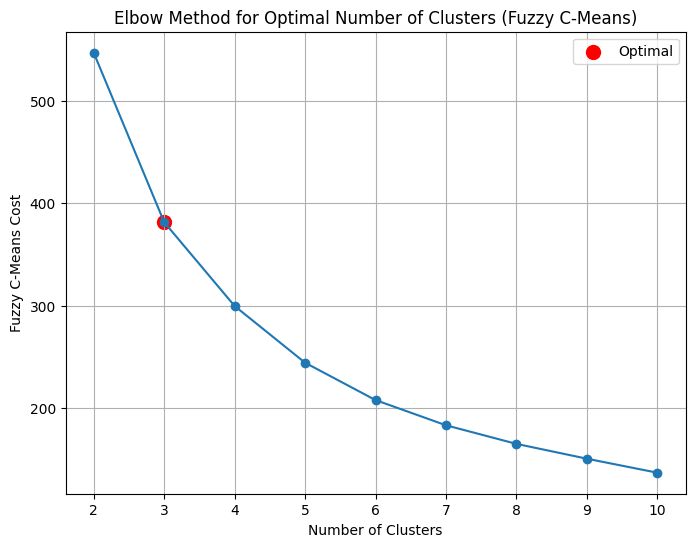

In [36]:
    delta_cost = np.diff(fuzzy_c_means_inertia)
    second_derivative = np.diff(delta_cost)
    optimal_index = np.where(second_derivative > 0)[0][0] + 1

    # Get the optimal number of clusters
    optimal_n_clusters = n_clusters_range[optimal_index]
    print(f"Optimal Number of Clusters: {optimal_n_clusters}")

    plt.figure(figsize=(8, 6))
    plt.plot(n_clusters_range, fuzzy_c_means_inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Fuzzy C-Means Cost')
    plt.title('Elbow Method for Optimal Number of Clusters (Fuzzy C-Means)')
    plt.scatter(optimal_n_clusters, fuzzy_c_means_inertia[optimal_index], color='red', label='Optimal', marker='o', s=100)
    plt.legend()
    plt.grid(True)
    plt.show()

In [37]:
fcm_custom = FuzzyCMeansCustom(n_clusters=optimal_n_clusters)
fcm_custom.fit(X)
print("Number of Clusters:", fcm_custom.n_clusters)

Number of Clusters: 3


Fuzzy Cluster Labels (Membership Values):
[[0.93605128 0.03378269 0.03016603]
 [0.4545256  0.38151716 0.16395724]
 [0.64309993 0.12778892 0.22911116]
 ...
 [0.42430021 0.14504666 0.43065313]
 [0.61316737 0.26292474 0.1239079 ]
 [0.38988319 0.13552372 0.47459309]]
Crisp Cluster Labels:
[0 0 0 ... 2 0 2]
Cluster Centers:
[[0.56477968 0.8009042 ]
 [0.74005198 0.29798096]
 [0.21028051 0.36693115]]


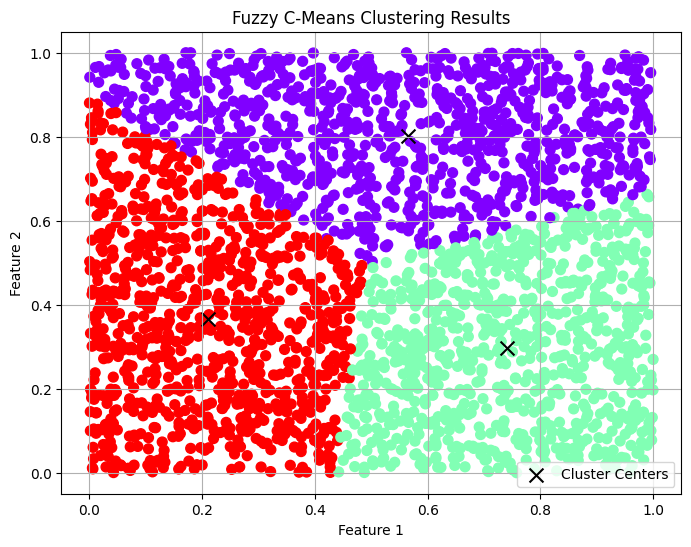

Cluster Purity (Fuzzy C-Means): 0.35


In [38]:
    # Evaluate the Fuzzy C-Means model
    cluster_membership = fcm_custom.update_membership(X, fcm_custom.cluster_centers)

    # To assign a data point to a cluster, you can use the cluster with the maximum membership value
    fuzzy_cluster_labels = np.argmax(cluster_membership, axis=1)

    # Print the fuzzy cluster labels (each data point's degree of membership in each cluster)
    print("Fuzzy Cluster Labels (Membership Values):")
    print(cluster_membership)

    # Calculate the crisp cluster assignments (assign each data point to the cluster with max membership)
    crisp_cluster_labels = np.argmax(cluster_membership, axis=1)

    # Print the crisp cluster labels
    print("Crisp Cluster Labels:")
    print(crisp_cluster_labels)

    # Calculate and print the cluster centers
    print("Cluster Centers:")
    print(fcm_custom.cluster_centers)

    # Plot the data points with colors indicating cluster membership
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=fuzzy_cluster_labels, cmap='rainbow', s=50)
    plt.scatter(fcm_custom.cluster_centers[:, 0], fcm_custom.cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Fuzzy C-Means Clustering Results')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Cluster purity measures how many data points in a cluster belong to the majority class of that cluster.
    if 'LeaveOrNot' in data.columns:
        confusion = confusion_matrix(leave_labels, fuzzy_cluster_labels)

        # Find the most frequent label in each cluster
        majority_labels = [np.argmax(np.bincount(leave_labels[fuzzy_cluster_labels == i])) for i in range(optimal_n_clusters)]

        # Calculate cluster purity as the sum of the majority class frequencies divided by the total number of data points
        cluster_purity = sum(confusion[i, majority_labels[i]] for i in range(optimal_n_clusters)) / len(leave_labels)
        print(f"Cluster Purity (Fuzzy C-Means): {cluster_purity:.2f}")

# **Hierarchical Clustering**

In [39]:
# Custom Hierarchical Clustering
class HierarchicalClusteringCustom:
    def __init__(self, n_clusters=None):
        self.n_clusters = n_clusters

    def fit(self, X):
        n_samples, n_features = X.shape
        self.labels_ = np.arange(n_samples)
        self.linkage_matrix_ = []

        while len(np.unique(self.labels_)) > self.n_clusters:
            min_dist = float("inf")
            merge_i, merge_j = -1, -1

            for i in range(n_samples):
                for j in range(i + 1, n_samples):
                    dist = np.linalg.norm(X[i] - X[j])
                    if dist < min_dist:
                        min_dist = dist
                        merge_i, merge_j = i, j

            # Merge the two clusters
            self.labels_[self.labels_ == merge_j] = merge_i
            self.linkage_matrix_.append([merge_i, merge_j, min_dist, len(np.unique(self.labels_))])

        self.cluster_centers_ = np.array([X[self.labels_ == label].mean(axis=0) for label in np.unique(self.labels_)])

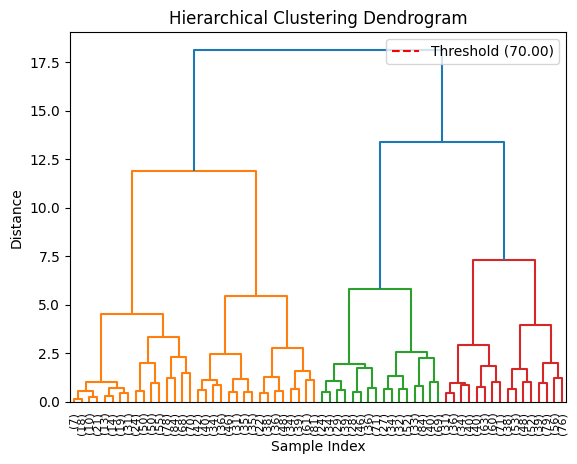

Optimal Number of Clusters: 1


In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Perform hierarchical clustering and generate the dendrogram
linkage_matrix = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_matrix, p=5, truncate_mode='level', leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Define a threshold for cutting the dendrogram
threshold = 70
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.legend()
plt.show()

optimal_n_clusters = len(np.where(linkage_matrix[:, 2] > threshold)[0]) + 1
print(f"Optimal Number of Clusters: {optimal_n_clusters}")

In [41]:
# if __name__ == "__main__":
n_clusters = 2  # Adjust the number of clusters as needed
hierarchical_custom = HierarchicalClusteringCustom(n_clusters=n_clusters)
hierarchical_custom.fit(X)

# Visualize the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_custom.labels_, cmap='rainbow', s=50)
plt.scatter(hierarchical_custom.cluster_centers_[:, 0], hierarchical_custom.cluster_centers_[:, 1], c='black', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering Results (Custom)')
plt.legend()
plt.grid(True)
plt.show()

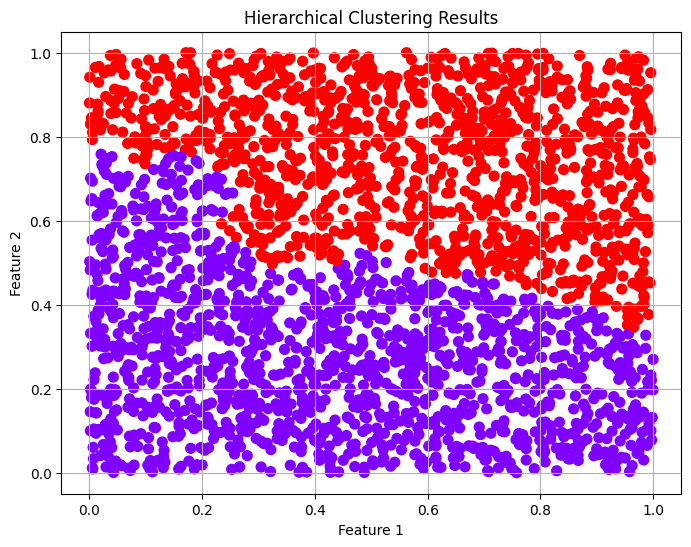

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X)

# Visualize the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering Results')
plt.grid(True)
plt.show()

In [ ]:
# Print the cluster labels
print("Cluster Labels (Custom Hierarchical Clustering):")
print(hierarchical_custom.labels_)

("Linkage Matrix:")
print(np.array(hierarchical_custom.linkage_matrix_))

Cluster Labels (Custom Hierarchical Clustering):
[   0    1    2 ... 2761 2762 2763]
[[1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]
 [1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]
 [1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]
 [1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]
 [1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]
 [1.62800000e+03 1.67100000e+03 1.98413929e-04 2.76300000e+03]]
